In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('food_ingredients_and_allergens.csv')

In [3]:
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains


In [5]:
df.shape

(399, 7)

In [6]:
sum(df.duplicated())

90

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(309, 7)

In [9]:
df.isna().sum()

Food Product       0
Main Ingredient    0
Sweetener          0
Fat/Oil            0
Seasoning          0
Allergens          0
Prediction         1
dtype: int64

In [10]:
df.columns


Index(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning',
       'Allergens', 'Prediction'],
      dtype='object')

In [11]:
for item in list(df.columns):
    print(item , "   " , df[item].nunique())

Food Product     259
Main Ingredient     101
Sweetener     10
Fat/Oil     36
Seasoning     186
Allergens     40
Prediction     2


In [12]:
df[(df['Allergens'] == 'None')&(df['Prediction']=="Contains")]

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
133,Spaghetti Bolognese,Ground beef,Sugar,Olive oil,Tomato sauce,None,Contains
134,Honey Mustard Chicken,Chicken breast,Honey,Mustard,Vegetable oil,None,Contains
135,BBQ Ribs,Pork ribs,Brown sugar,Vegetable oil,BBQ sauce,None,Contains
257,Samosa,Potatoes,None,Ghee,Spices,None,Contains
262,Rajma Chawal,Kidney beans,None,Ghee,Spices,None,Contains


In [13]:
df['Prediction'] = np.where((df['Allergens'] == 'None')&(df['Prediction']=="Contains"),"Does not contain",df['Prediction'])

In [14]:
df[(df['Allergens'] == 'None')&(df['Prediction']=="Contains")]

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction


In [15]:
X = df.drop(['Prediction','Allergens'], axis  =1)
y = pd.DataFrame(df['Prediction'])

In [17]:
for column in list(X.columns):
    X[column+' '+'Label'] = X[column].map(dict(zip(pd.Series(X[column].unique()),pd.Series([i for i in range(X[column].nunique())]))))

In [18]:
X.drop(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning'], axis =1 , inplace = True)
X.head()

,Food Product Label,Main Ingredient Label,Sweetener Label,Fat/Oil Label,Seasoning Label,Food Product Label Label,Main Ingredient Label Label,Sweetener Label Label,Fat/Oil Label Label,Seasoning Label Label
0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1
4,2,2,1,1,1,2,2,1,1,1
5,3,3,0,2,2,3,3,0,2,2
6,4,4,0,0,1,4,4,0,0,1


In [19]:
y.value_counts()

Prediction      
Contains            192
Does not contain    116
dtype: int64

In [20]:
y['Prediction Label'] = y['Prediction'].map({"Contains":1,"Does not contain" : 0})
y.drop(['Prediction'], axis =1 , inplace =True)
y.head()

,Prediction Label
0,1.0
2,1.0
4,1.0
5,1.0
6,1.0


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
LE = LabelEncoder()

In [30]:
df['Prediction'] = LE.fit_transform(df['Prediction'])

In [31]:
category_counts = df['Food Product'].value_counts()

df['Food Product Freq'] = df['Food Product'].map(category_counts)

In [32]:
category_counts = df['Main Ingredient'].value_counts()

df['Main Ingredient Freq'] = df['Main Ingredient'].map(category_counts)


In [33]:
category_counts = df['Sweetener'].value_counts()

df['Sweetener Freq'] = df['Sweetener'].map(category_counts)

In [34]:
category_counts = df['Fat/Oil'].value_counts()

df['Fat/Oil Freq'] = df['Fat/Oil'].map(category_counts)

In [35]:
category_counts = df['Seasoning'].value_counts()

df['Seasoning Freq'] = df['Seasoning'].map(category_counts)

In [36]:
category_counts = df['Allergens'].value_counts()

df['Allergens Freq'] = df['Allergens'].map(category_counts)

In [37]:
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction,Food Product Freq,Main Ingredient Freq,Sweetener Freq,Fat/Oil Freq,Seasoning Freq,Allergens Freq
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",0,1,1,72,65,9,1
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",0,2,1,215,45,7,1
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,0,1,3,215,45,7,70
5,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,0,1,1,72,33,5,70
6,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,0,1,1,72,65,7,70


In [38]:
df.columns

Index(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning',
       'Allergens', 'Prediction', 'Food Product Freq', 'Main Ingredient Freq',
       'Sweetener Freq', 'Fat/Oil Freq', 'Seasoning Freq', 'Allergens Freq'],
      dtype='object')

In [39]:
df = df.drop(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning','Allergens'],axis=1)

In [40]:
df.head()

,Prediction,Food Product Freq,Main Ingredient Freq,Sweetener Freq,Fat/Oil Freq,Seasoning Freq,Allergens Freq
0,0,1,1,72,65,9,1
2,0,2,1,215,45,7,1
4,0,1,3,215,45,7,70
5,0,1,1,72,33,5,70
6,0,1,1,72,65,7,70


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


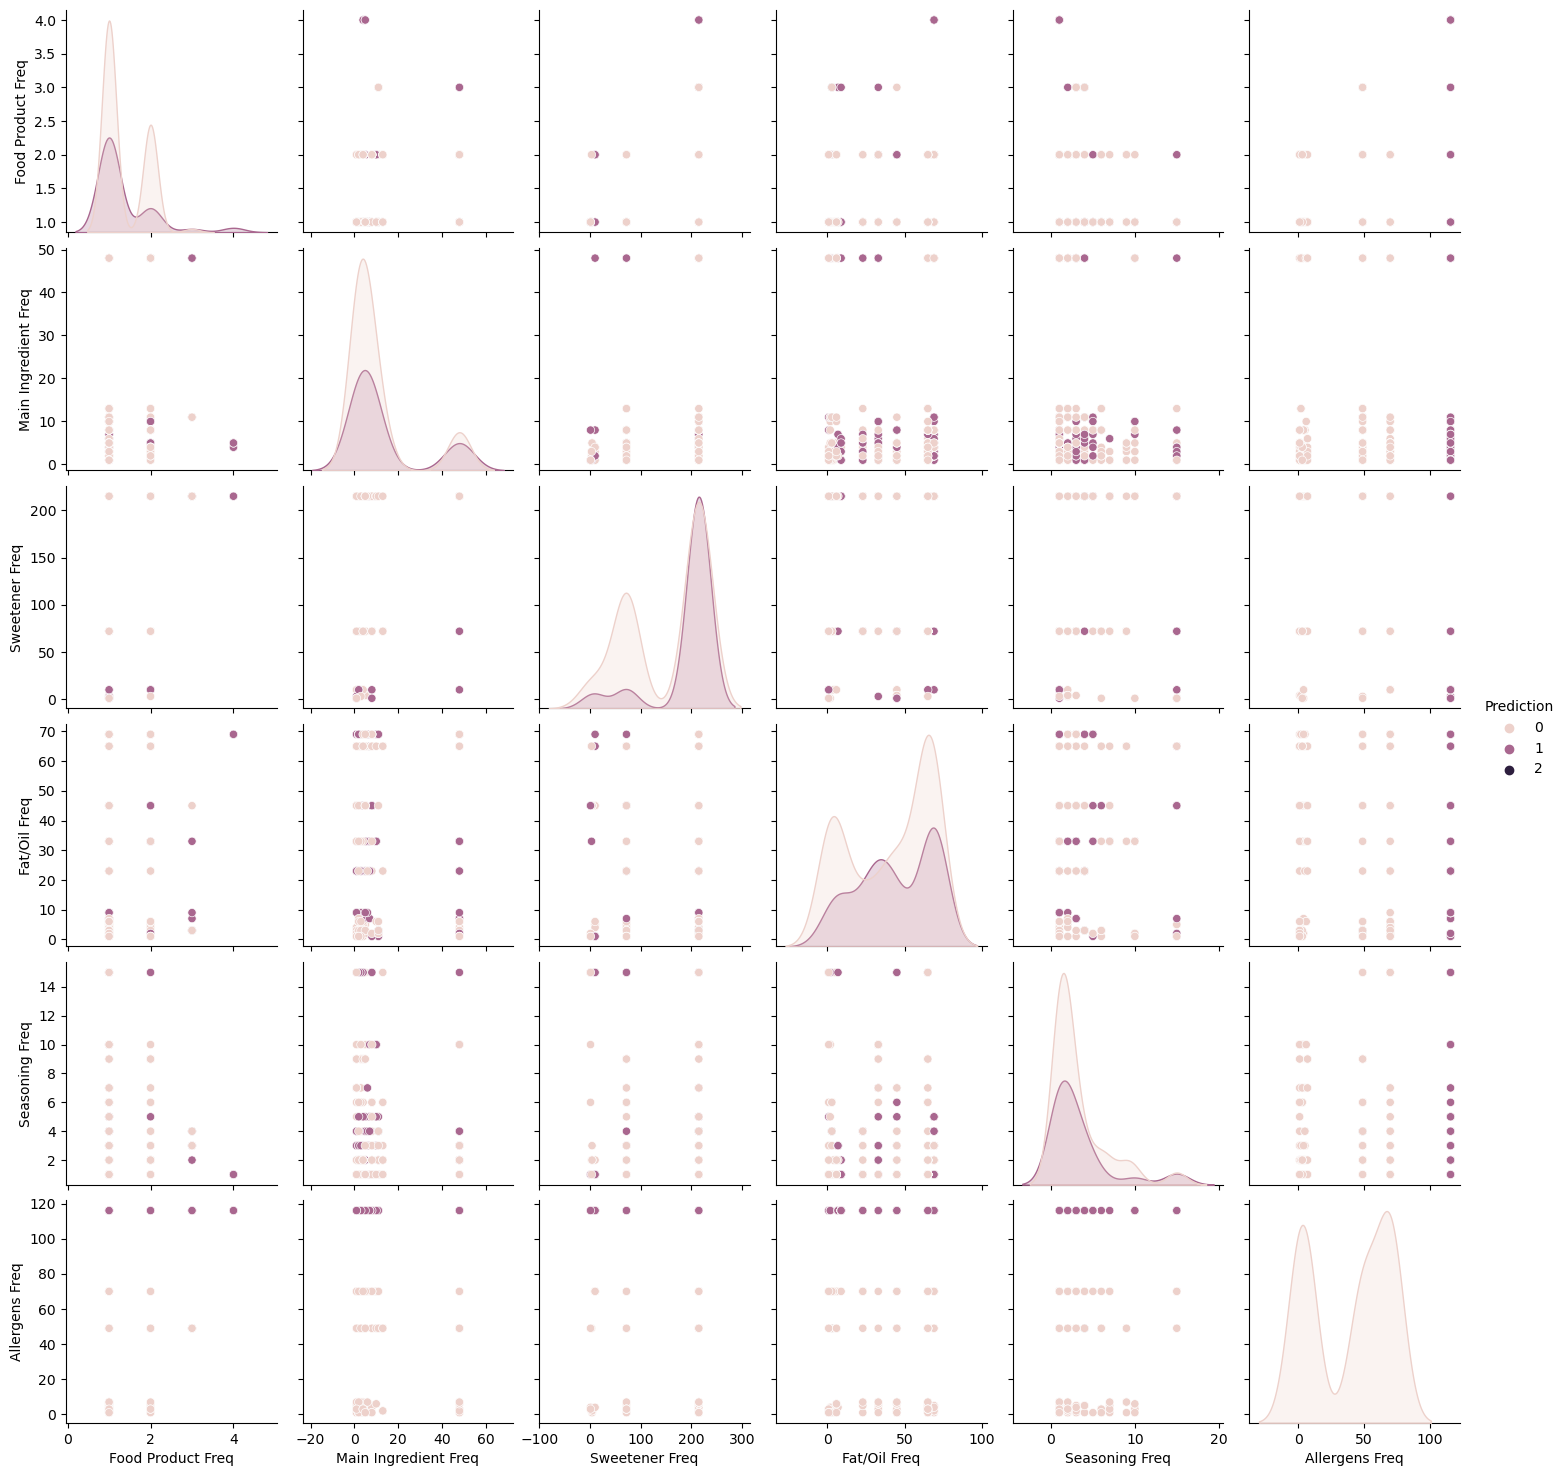

In [50]:
sns.pairplot(df,hue='Prediction')
plt.show()

In [51]:
Corr = df.corr()

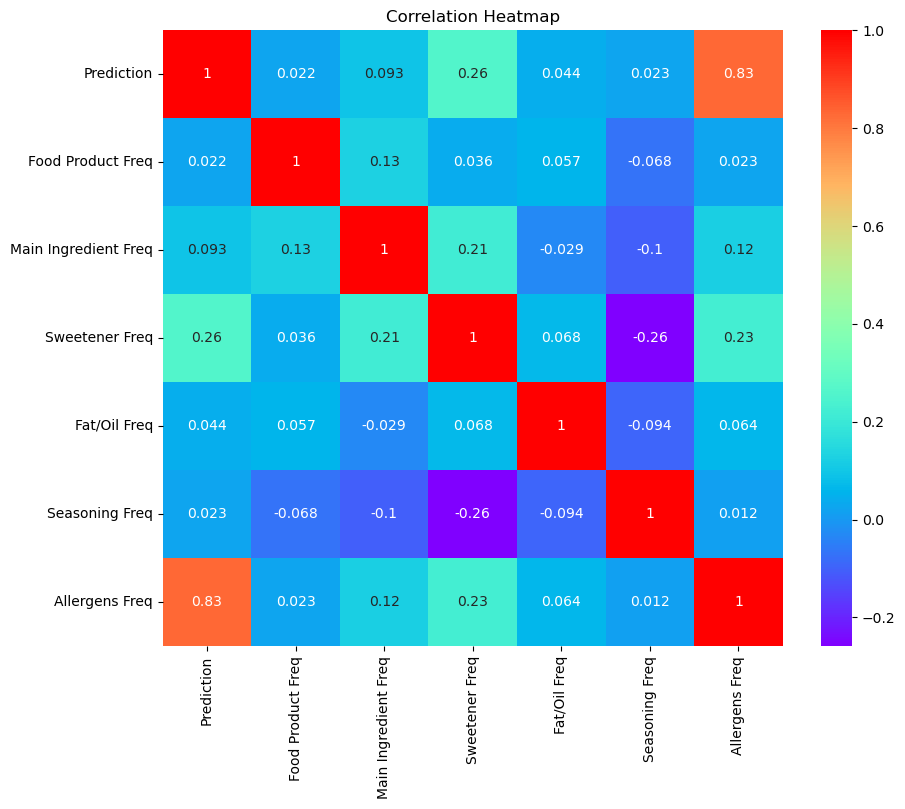

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(Corr, annot=True, cmap='rainbow')
plt.title('Correlation Heatmap')
plt.show()

In [53]:
X = df.iloc[:,1:]
X

,Food Product Freq,Main Ingredient Freq,Sweetener Freq,Fat/Oil Freq,Seasoning Freq,Allergens Freq
0,1,1,72,65,9,1
2,2,1,215,45,7,1
4,1,3,215,45,7,70
5,1,1,72,33,5,70
6,1,1,72,65,7,70
...,...,...,...,...,...,...
393,2,2,72,65,1,1
395,1,1,72,65,1,3
396,2,4,72,65,2,3
397,2,4,72,65,2,3


In [54]:
y = df.iloc[:,:1]
y

,Prediction
0,0
2,0
4,0
5,0
6,0
...,...
393,0
395,0
396,0
397,0


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
DT = DecisionTreeClassifier()

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
para = {
    'criterion' : ["gini", "entropy"],
    'max_depth' : range(1,10)
}

In [61]:
Gd = GridSearchCV(DT,param_grid=para,scoring='accuracy',cv=5)

In [62]:
Gd.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)},
             scoring='accuracy')

In [63]:
Gd.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [64]:
Gd.best_score_

0.9960000000000001

In [65]:
DT = DecisionTreeClassifier(criterion = 'gini',max_depth = 1)

In [66]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [67]:
y_hat = DT.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [69]:
print(accuracy_score(y_test,y_hat))

1.0


In [70]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        22

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [71]:
print(confusion_matrix(y_test,y_hat))

[[40  0]
 [ 0 22]]
